# Linear Regression: Cost Function and Gradient Implementation

In this coding exercise, you will be implementing the cost function and gradient function for linear regression. The cost function measures the error between the predicted values and the actual values, while the gradient function calculates the derivatives of the cost function with respect to the model parameters. You will use a synthetic dataset to test your code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Let's simulate some data
np.random.seed(0)

# Generate feature matrix X with a linear trend
n_samples = 1000
x_axis = np.linspace(-5, 5, n_samples).reshape(-1, 1)

# Generate feature matrix X with columns [1, x_axis, cos(frequency*x_axis)]
X = np.hstack((np.ones((n_samples, 1)), x_axis, np.cos(0.8 * x_axis)))

# Generate target variable y with a linear trend plus a cosine function
intercept = 1.5
slope = 0.7
amplitude = 4

# True model parameters
theta_true = np.array([intercept, slope, amplitude])

# Generate noise
noise = np.random.normal(0, 2, size=(n_samples))

# Define y = intercept + slope*x + amplitude*cos(frequency*x) + noise
y = X @ theta_true + noise

# TODO: Split the data into training and testing sets
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)

# Why do we need to split our data?

# Reshape the target variables
y_train = y_train.reshape((int(n_samples * (1 - test_size)), 1))
y_test = y_test.reshape((int(n_samples * test_size), 1))

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print()
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 3)
y_train shape: (800, 1)

X_test shape: (200, 3)
y_test shape: (200, 1)


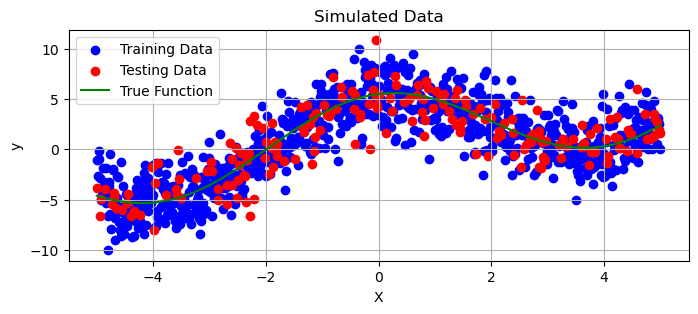

In [3]:
# TODO Plot the simulated data (train and test)
plt.figure(figsize=(8, 3))
plt.scatter(X_train[:, 1], y_train, color='blue', label='Training Data')
plt.scatter(X_test[:, 1], y_test, color='red', label='Testing Data')
plt.plot(X[:, 1], X @ theta_true, color='green', label='True Function')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simulated Data')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# TODO: Implement the predict function for linear regression
def predict(X, theta):
    """
    Predict the target variable using the linear regression model.
    
    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, p), where n is the number of samples and p is the number of features.
    theta (numpy.ndarray): Model parameters of shape (p, 1).
    
    Returns:
    y_hat (numpy.ndarray): Predicted target values of shape (p, 1).
    """
    
    y_hat = X @ theta
    
    return y_hat


# TODO: Implement the cost function for linear regression
def cost_function(X, y, theta):
    """
    Compute the cost function for linear regression.
    
    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, p), where n is the number of samples and p is the number of features.
    y (numpy.ndarray): Target values of shape (n, 1).
    theta (numpy.ndarray): Model parameters of shape (p, 1).
    
    Returns:
    mse (float): Cost value corresponding to the mean squared error.
    """
    
    # Number of samples
    n = len(y)
    
    # TODO: Predict the target variable using the linear regression model predict function
    y_hat = predict(X, theta)
    
    # TODO: Compute the mean squared error between the actual and predicted values
    mse = np.linalg.norm(y - y_hat) ** 2 / (2 * n)
    
    return mse


# TODO: Implement the gradient function for linear regression
def gradient_function(X, y, theta):
    """
    Compute the gradient of the cost function for linear regression.
    
    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, p), where n is the number of samples and p is the number of features.
    y (numpy.ndarray): Target values of shape (n, 1).
    theta (numpy.ndarray): Model parameters of shape (p,).
    
    Returns:
    gradient (numpy.ndarray): Gradient vector of shape (p, 1).
    """
    
    n = len(y)
    
    # TODO: Predict the target variable using the linear regression model predict function
    y_hat = predict(X, theta)
    
    # TODO: Compute the error term by subtracting the actual values from the predicted values
    error = y.reshape((n, 1)) - y_hat
    
    # TODO: Compute the gradient using X.transpose multuplied by the error vector
    gradient = - X.T @ error / n
    
    return gradient


# TODO: Implment the train function to learn the weights of the linear regression model using gradient descent
def train_model_optimization(X_train, y_train, learning_rate, num_iterations):
    """
    Train the linear regression model using gradient descent optimization.
    
    Parameters:
    X_train (numpy.ndarray): Feature matrix of shape (n, p) for training data.
    y_train (numpy.ndarray): Target values of shape (n,) for training data.
    learning_rate (float): Learning rate for gradient descent.
    num_iterations (int): Number of iterations for training.
    
    Returns:
    theta (numpy.ndarray): Model parameters of shape (p, 1).
    costs_train (list): List of training costs at each iteration.
    """
    
    n, p = X_train.shape
    theta = np.zeros((p, 1))
    costs_train = []
    
    for _ in range(num_iterations):
        # TODO: Compute the gradient
        gradient = gradient_function(X_train, y_train, theta)
        
        # TODO: Update the parameters using gradient descent
        theta -= learning_rate * gradient
        
        # TODO: Compute the cost for training data
        cost_train = cost_function(X_train, y_train, theta)
        
        # Append the costs to the respective lists
        costs_train.append(cost_train)
        
    return theta, costs_train

In [5]:
# TODO: Train the linear regression model using optimization with different learning rates and number of iterations
n_train, p = X_train.shape
n_test, p = X_test.shape

lr1 = 0.001
num_iter1 = 100
theta_hat1, train_costs1 = train_model_optimization(X_train, y_train.reshape((n_train, 1)), lr1, num_iter1)

lr2 = 0.001
num_iter2 = 500
theta_hat2, train_costs2 = train_model_optimization(X_train, y_train.reshape((n_train, 1)), lr2, num_iter2)

lr3 = 0.005
num_iter3 = 500
theta_hat3, train_costs3 = train_model_optimization(X_train, y_train.reshape((n_train, 1)), lr3, num_iter3)

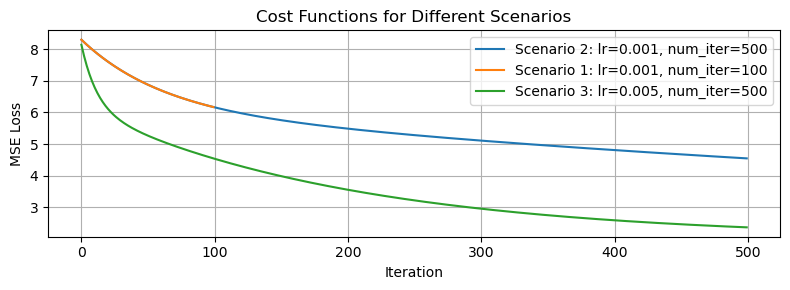

In [6]:
# Plot the cost functions for the three scenarios
plt.figure(figsize=(8, 3))

# TOD): Plot the cost function for scenario 2
plt.plot(train_costs2, label=f'Scenario 2: lr={lr2}, num_iter={num_iter2}')

# TOD): Plot the cost function for scenario 1
plt.plot(train_costs1, label=f'Scenario 1: lr={lr1}, num_iter={num_iter1}')

# TOD): Plot the cost function for scenario 3
plt.plot(train_costs3, label=f'Scenario 3: lr={lr3}, num_iter={num_iter3}')

plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('Cost Functions for Different Scenarios')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

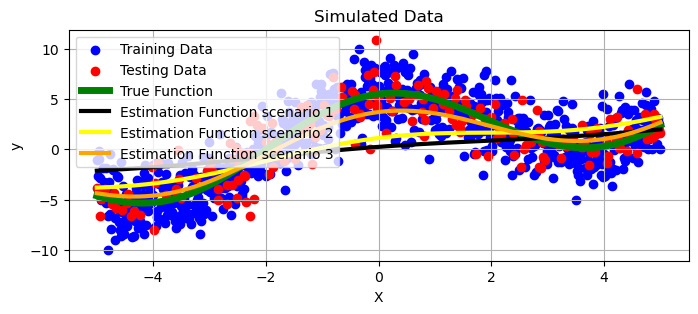

In [7]:
# Plot the fitted curves for the three scenarios
plt.figure(figsize=(8, 3))  # Create a new figure with a specified size

# TODO: Plot the training testing data points
plt.scatter(X_train[:, 1], y_train[:, 0], color='blue', label='Training Data')
plt.scatter(X_test[:, 1], y_test, color='red', label='Testing Data')

# TODO: Plot the true function line
plt.plot(X[:, 1], X @ theta_true, color='green', label='True Function', linewidth=5)

# TODO: Plot the estimation function line for scenario 1, 2 and 3
plt.plot(X[:, 1], X @ theta_hat1, color='black', label='Estimation Function scenario 1', linewidth=3)
plt.plot(X[:, 1], X @ theta_hat2, color='yellow', label='Estimation Function scenario 2', linewidth=3)
plt.plot(X[:, 1], X @ theta_hat3, color='orange', label='Estimation Function scenario 3', linewidth=3)

# Customizing the plot
plt.title('Simulated Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [8]:
# TODO: Display true theta and estimated theta
# What are your remarks?
print("True theta:\t\t\t", theta_true)
print("Estimated theta (Scenario 3):\t", theta_hat3[:, 0])

True theta:			 [1.5 0.7 4. ]
Estimated theta (Scenario 3):	 [0.96136006 0.70396574 2.75075024]


In [9]:
# TODO: Implment the train function to learn the weights of the linear regression model using gradient descent
def train_model_closed_form_solution(X_train, y_train):
    """
    Train the linear regression model using closed form solution.
    
    Parameters:
    X_train (numpy.ndarray): Feature matrix of shape (n, p) for training data.
    y_train (numpy.ndarray): Target values of shape (n,) for training data.
    
    Returns:
    theta (numpy.ndarray): Model parameters of shape (p, 1).
    """
    
    # TODO: Compute theta
    theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
    
    return theta

In [10]:
# TODO: Train the linear regression model using closed form solution
theta_hat_closed_form = train_model_closed_form_solution(X_train, y_train)

# Evaluate the performance of the model using mean squared error
mse_train = cost_function(X_train, y_train, theta_hat_closed_form)
mse_test = cost_function(X_test, y_test, theta_hat_closed_form)

print("Train Mean Squared Error:", mse_train)
print("Test  Mean Squared Error:", mse_test)

# What do you think? of this results?

Train Mean Squared Error: 2.0031228522804687
Test  Mean Squared Error: 1.686311672346838


In [11]:
# TODO: Display true theta based on optimization and closed form solution
# What are your remarks?
print("True theta:\t\t\t", theta_true)
print("Estimated theta (Optimization):\t", theta_hat3[:, 0])
print("Estimated theta (Closed form):\t", theta_hat_closed_form[:, 0])

True theta:			 [1.5 0.7 4. ]
Estimated theta (Optimization):	 [0.96136006 0.70396574 2.75075024]
Estimated theta (Closed form):	 [1.39685276 0.69760844 3.87171471]


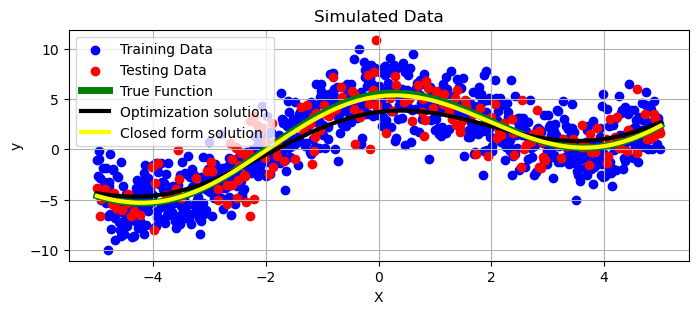

In [12]:
# Plot the fitted curves using optimization vs closed form solution
plt.figure(figsize=(8, 3))  # Create a new figure with a specified size

# Plot the training testing data points
plt.scatter(X_train[:, 1], y_train[:, 0], color='blue', label='Training Data')
plt.scatter(X_test[:, 1], y_test, color='red', label='Testing Data')

# Plot the true function line
plt.plot(X[:, 1], X @ theta_true, color='green', label='True Function', linewidth=5)

# TODO: Plot the estimation function based on optimization solution
plt.plot(X[:, 1], X @ theta_hat3, color='black', label='Optimization solution', linewidth=3)

# TODO: Plot the estimation function based on closed form solution
plt.plot(X[:, 1], X @ theta_hat_closed_form, color='yellow', label='Closed form solution', linewidth=3)

# Customizing the plot
plt.title('Simulated Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Linear Regression:  California housing case study

In this coding exercise, you will use the linear regression algorithm that you coded previously to study a real dataset. You will split it into training and testing data, normalize the features.

In [13]:
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
# Load the dataset (e.g., California housing dataset from scikit-learn)
data = fetch_california_housing()

X = data.data
y = data.target

# TODO: Split the dataset into training and testing data (80% train, 20% test). Use the train_test_split() function
# X_train, X_test, y_train, y_test = # TODO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# TODO: Normalize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# What is the dataset about? print data.DESCR
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [16]:
# TODO: Train the linear regression model
learning_rate = 0.1
num_iterations = 200

theta_hat_opt, _ = train_model_optimization(X_train, y_train, learning_rate, num_iterations)
theta_hat_cfs = train_model_closed_form_solution(X_train, y_train)

# TODO: Evaluate the performance of the model using the cost function on train and test datasets
mse_train_opt = cost_function(X_train, y_train, theta_hat_opt)
mse_test_opt = cost_function(X_test, y_test, theta_hat_opt)

mse_train_cfs = cost_function(X_train, y_train, theta_hat_cfs)
mse_test_cfs = cost_function(X_test, y_test, theta_hat_cfs)

print("Train Mean Squared Error (Optimization):", mse_train_opt)
print("Test  Mean Squared Error (Optimization):", mse_test_opt)
print()
print("Train Mean Squared Error (Closed-form solution):", mse_train_cfs)
print("Test  Mean Squared Error (Closed-form solution):", mse_test_cfs)

Train Mean Squared Error (Optimization): 52826.19907061775
Test  Mean Squared Error (Optimization): 12982.030180696176

Train Mean Squared Error (Closed-form solution): 2.4093466477575527
Test  Mean Squared Error (Closed-form solution): 2.3905834438898648


In [17]:
# TODO: Display the parameter estimates
# Interpret the results?

# Print the parameter estimates from the optimization approach
print("Parameter estimates (Optimization approach):", theta_hat_opt[:, 0])

# Print the parameter estimates from the closed-form solution
print("Parameter estimates (Closed-form solution):", theta_hat_cfs)

Parameter estimates (Optimization approach): [ 0.83664189  0.1462493  -0.21690425  0.24206347  0.00224725 -0.03422003
 -0.68117876 -0.65002861]
Parameter estimates (Closed-form solution): [ 0.82624793  0.1171006  -0.24891059  0.29038746 -0.00864349 -0.03056429
 -0.90042112 -0.87058566]


# Linear Regression using scikit-learn

In this coding exercise, you will apply linear regression to the California Housing dataset using the scikit-learn library. The dataset contains information about housing prices in various districts of California, along with several features that can be used to predict the housing prices.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# TODO: Create a linear regression model using LinearRegression
model = LinearRegression()

# TODO: Fit the model to the training data using .fit() method
model.fit(X_train, y_train)

# TODO: Extract the coefficients from the trained model using .coef_ attribute
coef = model.coef_
print("Estimated coefficients:", coef)

# TODO: Make predictions on the test data using .predict() method
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# TODO: Calculate the mean squared error using mean_squared_error function
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print the mean squared error
print()
print("Mean Squared Error (train):", mse_train)
print("Mean Squared Error (test):", mse_test)

# What are your thoughts?
# Do you see significant differences between sklearn results and your results?

Estimated coefficients: [ 0.82624793  0.1171006  -0.24891059  0.29038746 -0.00864349 -0.03056429
 -0.90042112 -0.87058566]

Mean Squared Error (train): 0.5234413607125448
Mean Squared Error (test): 0.5289841670367208
